In [1]:
import pandas as pd
import os

In [2]:
'''
    dict_file dict contains the key values for file names 
    data_folder list contains the folder names for the data
    Ex: If data is in folder {cwd} + '\data\subfolder'
    data_folder = ['data', 'subfolder']
    Assumes that data folder and ipynb file are in the same directory level
'''

data_folder = ['data']
dict_file = {
            "_spam_csv" : 'spam.csv',
            }


def get_file_path(data_folder: str, dict_file: dict) -> dict :
    path = os.getcwd()
    for folder in data_folder:
        path = os.path.join(path, folder)
    
    for key,values in dict_file.items():
        dict_file[key] = os.path.join(path, values)
    
    return dict_file

get_paths = get_file_path(data_folder, dict_file)
_dict_filepath = get_paths

spam_csv = _dict_filepath['_spam_csv']

In [3]:
df = pd.read_csv(spam_csv)
df['spam']=df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


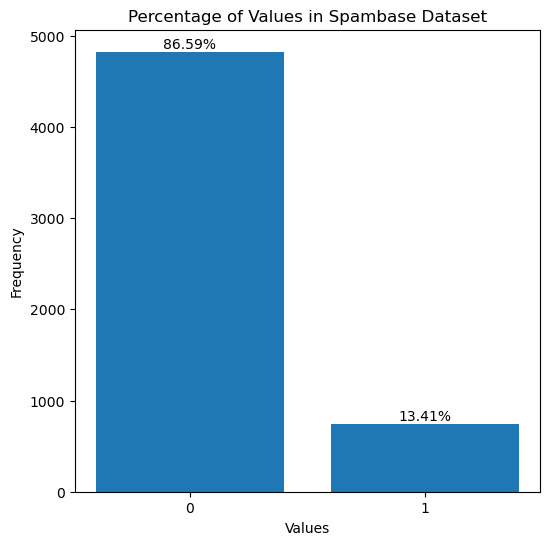

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace 'column_name' with the actual name of your column
# Replace 'DataFrame' with the actual name of your DataFrame
data = {
    'column_name': [value for value in df['spam'] if pd.notnull(value)]
}
frequency_data = pd.DataFrame(data)

# Count the frequency of non-null values in the specified column
value_counts = frequency_data['column_name'].value_counts()

# Sort values by index (0 and 1)
sorted_value_counts = value_counts.sort_index()

# Calculate percentages
total_values = sorted_value_counts.sum()
percentages = (sorted_value_counts / total_values) * 100

# Plotting
plt.figure(figsize=(6, 6))  # Increase figure height
bars = plt.bar(sorted_value_counts.index, sorted_value_counts.values)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Percentage of Values in Spambase Dataset')
plt.xticks([0, 1])  # Set x-axis ticks to only 0 and 1

# Adding percentages as labels on top of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{percentage:.2f}%',
        ha='center',
        va='bottom',
    )

plt.show()

In [5]:
from imblearn.over_sampling import RandomOverSampler

In [6]:
X = df.Message
y = df.spam

In [7]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2)

# Resample the training data using SMOTETomek
# sm = SMOTETomek(random_state=0)
# X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [8]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Train a Naive Bayes classifier on the resampled data
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate the classifier on the testing data
y_pred = nb.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.97847533632287


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the true labels and predicted labels
y_true = y_test

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.901840490797546
Recall: 0.9483870967741935
F1-score: 0.9245283018867925


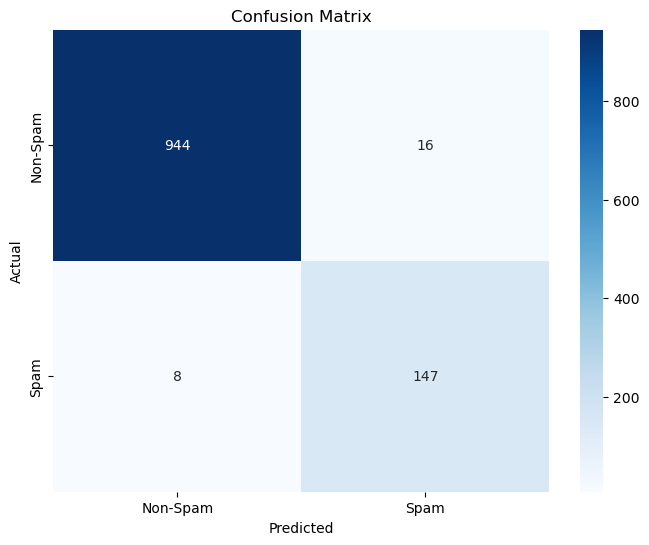

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()
